# HW2: Differential Privacy Foundations

### Bhaven Patel
### 3/12/2019

I worked with Anthony Rentsch and Lipika Ramaswamy on this homework.

## Problem 1: Mechanisms

## Problem 2: Evaluating DP Algorithms with Synthetic Data

In [1]:
rm(list=ls())		# Remove any objects in memory

**(a)**<br>
Create a data generating function that samples from the Poisson distribution.

In [2]:
# Random draws from Poisson distribution
#
# mean- numeric, mean of the distribution
# size integer, number of draws
# 
# return Random draws from Laplace distribution
# example:
# 
# sample_poisson(num_draws=1000)

sample_poisson <- function(mean=10, num_draws=1){
	data = rpois(n = num_draws, lambda = mean);
    return(data);
}

**(b)**<br>
I picked the first mechanism from Problem 1: $M(x) = [\bar{x} + Z]_0^1$, $Z \sim Lap \left(\dfrac{GS}{\epsilon} \right)$

In [3]:
# Sign function
# 
# Function to determine what the sign of the passed values should be.
#
# x numeric, value or vector or values
# return The sign of passed values
# example:
#
# sgn(rnorm(10))
# Taken from James Honaker's histogramRelease.r
sgn <- function(x) {
    return(ifelse(x < 0, -1, 1))
}

# Random draw from Laplace distribution
#
# mu numeric, center of the distribution
# b numeric, spread
# size integer, number of draws
# 
# return Random draws from Laplace distribution
# example:
# 
# rlap(size=1000)
# Taken from James Honaker's histogramRelease.r
rlap = function(mu=0, b=1, size=1) {
    p <- runif(size) - 0.5
    draws <- mu - b * sgn(p) * log(1 - 2 * abs(p))
    return(draws)
}

## Clip a variable to a range. Taken from James Honaker's histogramRelease.r
clip <- function(x, lower, upper){
	x.clipped <- x
	x.clipped[x.clipped<lower] <- lower
	x.clipped[x.clipped>upper] <- upper
	return(x.clipped)
}

## Differentially private mean release. Taken from James Honaker's laplaceMeanReleaseFull.r
meanRelease <- function(x, lower=0, upper, epsilon){
    n <- length(x); #get number of data points/observations
    
    sensitivity <- (upper - lower)/n; #calculate GS
    scale <- sensitivity / epsilon; #calculate scale for laplace noise

    x.clipped <- clip(x, lower, upper);
    sensitiveValue <- mean(x.clipped);
    DPrelease <- sensitiveValue + rlap(mu=0, b=scale, size=1);
    DPrelease <- clip(DPrelease, lower, upper); #clip the DP-mean if it lower/greater than the desired bounds
    
    return(list(release=DPrelease, true_clipped=sensitiveValue ));
}

**(c)**<br>
For n=200 and $\epsilon$=0.5, plot the root mean squared error as a function of the upper bound b

In [5]:
#set parameters
n = 200;
epsilon = 0.5;
num_sims = 10; #number of simulations to run for each upper bound

In [6]:
#set the seed
set.seed(24);

b_vals = seq(from = 1, to=100); #create sequence of upper bounds

datasets <- matrix(NA, nrow=n, ncol=num_sims);
#generate 'num_sims' different datasets from Poisson distribution
for(i in 1:num_sims){
    datasets[,i] = sample_poisson(num_draws = n); #put i-th dataset in column i
}
dataset_means = colMeans(datasets); #calculate mean for each dataset

#create matrix to hold upper bound and rmse for mean DP-releases, average mean
rmse_vals = matrix(NA, nrow=length(b_vals), ncol=3); 
for(b in b_vals){
    dp_means = c(); #vector to hold DP-released means for each simulation
    for(i in 1:num_sims){
        results = meanRelease(datasets[,i], lower = 0, upper = b, epsilon = epsilon); #get mean release
        dp_means <- c(dp_means, results$release);
    }
    
    #calculate RMSE
    rmse = ( sum( (dp_means - dataset_means)**2 ) / length(dp_means)) ** 0.5; 
    rmse_vals[b,] <- c(b, rmse, mean(dp_means));
}


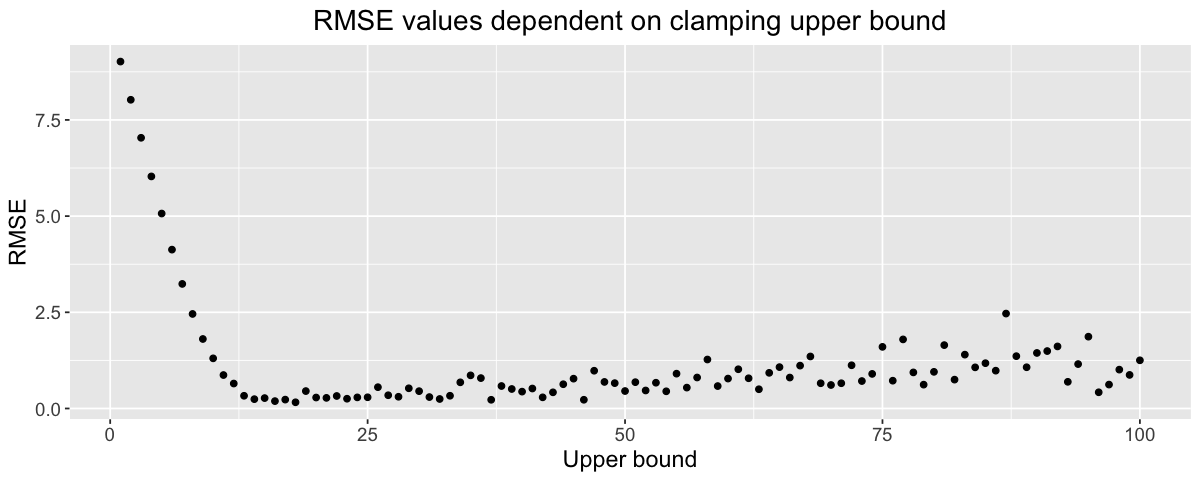

In [9]:
library(ggplot2); #import library for plotting
library(grid);

#### Plot results ####
final_results <- as.data.frame(rmse_vals);
colnames(final_results) <- c("Upper_bound", "RMSE", "Average true mean");
f_size = 16;
fifty = 0.5;
# Plot average RMSE of reconstruction against noise input
p_rmse <- ggplot(data = final_results, aes(x=final_results$Upper_bound, y=final_results$RMSE)) + geom_point();
p_rmse <- p_rmse + labs(title="RMSE values dependent on clamping upper bound", x="Upper bound", y = "RMSE") + theme(plot.title = element_text(hjust=0.5), text = element_text(size=f_size-2));
options(repr.plot.width=10, repr.plot.height=4); #set plot dimensions
p_rmse #show plot

In [10]:
print(final_results[final_results$RMSE == min(final_results$RMSE), ]);

   Upper_bound     RMSE Average true mean
18          18 0.161492          9.954823


The optimal value $b^{*}$ is 18. From the graph, it looks like values from 16 to 18 all have comparable RMSE values and could be used as good upper bounds.

**(d)**<br>
If we generate an optimal value $b^*$ based on bootstrapped samples from our dataset $x$, then we may leak information about outliers in the our dataset. This would occur because some of the bootstraps will contain the outliers, and their RMSE's will be minimized when the upper bound for clipping is near or greater than the value of the outlier. Thus by looking at the graph of average RMSE versus upper bound for the bootstrapped samples, it is possible to infer what the values of the outliers could be. This would not be differentially private because outliers in the dataset could be identified.

**(e)**<br>
We 

## Problem 3: Regression

**(a)**<br>

**(b)**<br>

**(c)**<br>